# ABDULLAH ATAHAN TÜRK

# 21827943

# Logistic Regression and Support Vector Machine classifier

### 1. Logistic Regression 
The __logistic function__ (which is more commonly called __sigmoid function__) basically maps an input to an output of values between 0 and 1. And it is defined as follows:
$$y(z) = \frac{1}{1+ exp(-z)}$$



Logistic regression, by default, is limited to two-class classification problems. It cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. Instead, it requires modification to support multi-class classification problems.

__The multinomial logistic regression__ (often just called 'multinomial regression') algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predict probability distribution to a multinomial probability distribution to natively support multi-class classification problems.

### 2. Support Vector Machine

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes.Of particular importance is the use of different kernel functions via the kernel parameter.

Kernels can be used that transform the input space into higher dimensions such as a Polynomial Kernel and a Radial Kernel. This is called the Kernel Trick. It is desirable to use more complex kernels as it allows lines to separate the classes that are curved or even more complex. This in turn can lead to more accurate classifiers.

### Assignment

In this assignment, you are given a dataset comprising information about dinosaurs. You will use logistic regression and support vector machine models to predict the type of dinosaur based on the provided information. In this assignment, you may utilize built-in libraries. Employ _stratified k-fold cross-validation_ (CV) with 10 folds for evaluating the classification models. Stratification ensures that each CV fold maintains a similar distribution of class examples as the entire training set. You can design various experiments by selecting some/all information provided in the dataset. Here, we expect the best result you obtained after these experiments and observations. Please explicitly mention your feature selection method in your report while presenting results. 


Stratified k-fold cross-validation is a technique used to evaluate the performance of machine learning models, particularly in classification tasks, where the target class distribution may be imbalanced. In this method, the dataset is divided into 'k' equally sized folds, ensuring that each fold maintains a similar distribution of class examples as the entire dataset. This stratification process helps to reduce the bias and variance in model performance estimation by preventing a skewed distribution of classes in the train and test sets.

During the cross-validation process, the model is trained on 'k-1' folds and tested on the remaining fold, iterating this process 'k' times. Each iteration uses a different fold for testing, and the average performance metric (e.g., accuracy) is calculated over all iterations.

Here's a code example using the scikit-learn library:


In this example, we use the Iris dataset and a logistic regression model to demonstrate stratified k-fold cross-validation with 5 folds. The performance of the model is evaluated using accuracy as the performance metric, and the mean accuracy is reported.

Stratified cross-validation is particularly useful when dealing with imbalanced datasets, where some classes have significantly fewer examples compared to others. In such cases, using standard cross-validation might lead to situations where one or more folds contain very few or even none of the underrepresented class instances. This could result in an inaccurate and biased performance estimation of the model, as the model is not adequately tested on all classes.

For balanced datasets, where class distributions are roughly equal, stratified cross-validation may not provide significant benefits over standard cross-validation. However, it is still a good practice to use stratified cross-validation as a default approach, as it generally leads to more stable and reliable performance estimates.

__Evaluation Metrics__: Provide _mean weighted F1 scores_ and a confusion matrix to evaluate and compare the performance of the classification models.

Here is an example code how to compute mean weighted F1 score in k-fold cross-validation setting:

### Submissions


After training your models with the data in _train.csv_, use the given _test.csv_ data for your predictions (predicted 'type' values); save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition for logistic regression: https://www.kaggle.com/t/1aad2bcbe8c14b80918ec67ef7041c9b

Kaggle competition for support vector machine: https://www.kaggle.com/t/f4f6aee930674ea3a86aada32d861cfa

**Due Date**: 30.04.2023

**Note**: The late submission rules previously announced from the piazza apply.

### Your Work

Mean accuracy for Logistic Regression: 0.9148333333333334
Mean weighted-average F1-score across 10 folds for Logistic Regression: 0.9126157166907166
Mean accuracy for SVM: 0.9308333333333334
Mean weighted-average F1-score across 10 folds for SVM: 0.9274422068672068


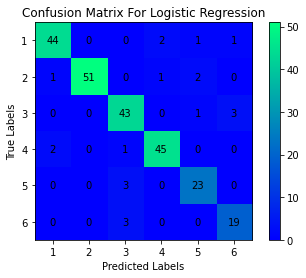

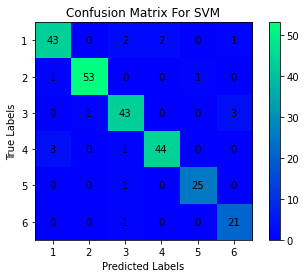

In [5]:
#Include your codes below by including as many cells as necessary to clearly demonstrate your work
#Please write your codes in separate sections for data pre-processing, Logistic Regression and SVM models etc.

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.svm import SVC


df = pd.read_csv("train.csv", delimiter=",")
df = df.drop("link", axis=1) #I drop some unnecessary columns.
df = df.drop("named_by", axis=1)
df = df.drop("id", axis=1)
df["species"] = df["species"].fillna(1)
#I didn't use the Species column anyway,
#but nan values were causing problems for further processing when reading csv so I filled nan values in species.
df["length"] = df["length"].str[:-1] #Convert from string to float
df["length"] = df["length"].astype(float)
mean_len = df["length"].mean()
mean_len = round(mean_len, 1)
df["length"] = df["length"].fillna(mean_len) #There were some nan values, i filled them with mean.
df["length"] = df["length"].astype(float)
df["period"] = df["period"].str.replace(r'\d+-\d+', '', regex=True)
df["period"] = df["period"].str.replace(r'\d+', '', regex=True)
df['period'] = df['period'].str.replace('  million years ago', '')
df["taxonomy"] = df["taxonomy"].str.split().str[:6].str.join(' ')

#In above, i did some preprocess on period and taxanomy. I edited period to get better feature results.
#Also, in taxonomy i take first 6 words to get better results. Both of them worked well.
#In below i did same things for the test.csv file

testdf = pd.read_csv("test.csv", delimiter=",")
testdf["species"] = testdf["species"].fillna(1)
testdf = testdf.drop("link", axis=1)
testdf = testdf.drop("named_by", axis=1)
testdf = testdf.drop("id", axis=1)
testdf["length"] = testdf["length"].str[:-1]
testdf["length"] = testdf["length"].astype(float)
testdf["length"] = testdf["length"].fillna(mean_len)
testdf["length"] = testdf["length"].astype(int)
testdf["period"] = testdf["period"].str.replace(r'\d+-\d+', '', regex=True)
testdf["period"] = testdf["period"].str.replace(r'\d+', '', regex=True)
testdf['period'] = testdf['period'].str.replace('  million years ago', '')
testdf["taxonomy"] = testdf["taxonomy"].str.split().str[:6].str.join(' ')

#In below, i writed a function to convert string values to integer values.
def string_to_number_df(column_name,data):
    unique_values = set(data[column_name].unique())
    mapping = {value: index + 1 for index, value in enumerate(sorted(unique_values))}
    return mapping

#There was some values as "unknown". They were just 3 or 4 values so i just filled them with ones.
def convert_to_one(val):
    if isinstance(val, str):
        return 1
    else:
        return val

#Below there is a dict for y label.
df["type"] = df["type"].replace({'small theropod':1, 'sauropod':2, 'euornithopod':3, "large theropod":4, "armoured dinosaur":5, "ceratopsian":6})

map_diet = string_to_number_df("diet",df)
map_period = string_to_number_df("period",df)
map_lived = string_to_number_df("lived_in",df)
map_taxo = string_to_number_df("taxonomy",df)

df["diet"] = df["diet"].replace(map_diet)
df["period"] = df["period"].replace(map_period)
df["lived_in"] = df["lived_in"].replace(map_lived)
df["taxonomy"] = df["taxonomy"].replace(map_taxo)

testdf["diet"] = testdf["diet"].replace(map_diet)
testdf["period"] = testdf["period"].replace(map_period)
testdf["lived_in"] = testdf["lived_in"].replace(map_lived)
testdf["taxonomy"] = testdf["taxonomy"].replace(map_taxo)
testdf["lived_in"] = testdf["lived_in"].fillna(1)

y = df["type"]
X = df[["diet", "period", "length", "taxonomy"]] #I dropped some columns to get better mean accuracy.
X_array = X.values
y_array = y.values
skf = StratifiedKFold(n_splits=10) #As mentioned, i split 10 folds.
model = LogisticRegression(multi_class="multinomial", solver="lbfgs",max_iter=2000)
# I did 2000 iters to avoid from convergence warning. Best worked solver is lbfgs.
# Below, i implemented multinomial regression and calculate accuracy and f1. I calculated confussion matrix at the end.
accuracy_scores = []
f1_scores = []
confs = np.zeros((6,6))
for train_index, test_index in skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    y_pred = model.predict(X_test)
    fold_f1_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(fold_f1_score)
    matrix = confusion_matrix(y_test, y_pred)
    confs += matrix


mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy for Logistic Regression:", mean_accuracy)
mean_weighted_f1_score = np.mean(f1_scores)
print("Mean weighted-average F1-score across", 10, "folds for Logistic Regression:", mean_weighted_f1_score)


test_X = testdf[["diet", "period","length", "taxonomy"]]
test_X = test_X.applymap(convert_to_one)
test_X_array = test_X.values
log_predicts = model.predict(test_X_array)
log_df = pd.DataFrame({"type":log_predicts})
log_df["type"] = log_df["type"].replace({1:'small theropod', 2:'sauropod', 3:'euornithopod', 4:"large theropod", 5:"armoured dinosaur", 6:"ceratopsian"})
log_df.insert(0, 'Id', np.arange(1, len(log_predicts)+1))
log_df.to_csv('prediction_log.csv', index=False)

# Below i implemented SVM and calculated f1 and accuracy. I did 12000 iters to avoid convergence warning.
model_svm = SVC(kernel="linear", max_iter=12000)
accuracy_scores_svm = []
f1_scores_svm = []
confs_svm = np.zeros((6,6))
for train_index, test_index in skf.split(X_array, y_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    model_svm.fit(X_train, y_train)
    accuracy = model_svm.score(X_test, y_test)
    accuracy_scores_svm.append(accuracy)
    y_pred = model_svm.predict(X_test)
    fold_f1_score = f1_score(y_test, y_pred, average='weighted')
    f1_scores_svm.append(fold_f1_score)
    matrix = confusion_matrix(y_test, y_pred)
    confs_svm += matrix


mean_accuracy_svm = np.mean(accuracy_scores_svm)
print("Mean accuracy for SVM:", mean_accuracy_svm)
mean_weighted_f1_score_svm = np.mean(f1_scores_svm)
print("Mean weighted-average F1-score across", 10, "folds for SVM:", mean_weighted_f1_score_svm)

#Below i calculated and visualized confussion maxrix.
class_names = ['1', '2', '3', '4', '5', '6']
fig, ax = plt.subplots()
im = ax.imshow(confs, cmap='winter')

ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
cbar = ax.figure.colorbar(im, ax=ax)
plt.title('Confusion Matrix For Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, int(confs[i, j]), ha="center", va="center", color="black")

plt.show()


figsvm, axsvm = plt.subplots()
imsvm = axsvm.imshow(confs_svm, cmap='winter')
axsvm.set_xticks(range(len(class_names)))
axsvm.set_yticks(range(len(class_names)))
axsvm.set_xticklabels(class_names)
axsvm.set_yticklabels(class_names)
cbarsvm = axsvm.figure.colorbar(imsvm, ax=axsvm)
plt.title('Confusion Matrix For SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = axsvm.text(j, i, int(confs_svm[i, j]), ha="center", va="center", color="black")

plt.show()

svm_predicts = model_svm.predict(test_X_array)
svm_df = pd.DataFrame({"type":svm_predicts})
svm_df["type"] = svm_df["type"].replace({1:'small theropod', 2:'sauropod', 3:'euornithopod', 4:"large theropod", 5:"armoured dinosaur", 6:"ceratopsian"})
svm_df.insert(0, 'Id', np.arange(1, len(svm_predicts)+1))
svm_df.to_csv('prediction_svm.csv', index=False)


As we see, SVM has a little bit better scores than Logistic Regression. Especially on class5:armoured dinosaur and class6:ceratopsian SVM has evidently better predictions than logistic regression in confussion matrix. 
I deleted the features that I thought were unnecessary and instead of directly numbering some of the features, I edited them a little and numbered them. For example, in "taxonomy" i just picked first 6 words which gave me the best results.
One of the things that caught my eye while implementing Logistic Regression and SVM was that it is easier to misclassify y labels that are few in the train dataset.
On SVM i tried all available kernels such as polynomial,RBF, linear etc. I get the best results with the linear kernel. this shows us that our data is  linearly separable or can be approximately linearly separable. For example when i used polynomial kernel, i got really bad results and when i used RBF i get worse results than linear kernel but better than polynomial kernel.
Finally, i can say that i get better results with SVM rather than Logistic Regression.